# <b>Arrests by Time of Day</b>

<i>to know when the bastards are most active</i>

In [1]:
import numpy as np
import pandas as pd
import warnings, datetime
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib import cm
from scipy.interpolate import interp1d

#suppressing mixed dtypes, null vals in years without data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arrests_original = pd.read_csv("Desktop/CMPU/arrests/Arrests 2011-2025 (clean).csv")
arrests_original = arrests_original.drop("Unnamed: 0", axis=1)

pd.options.mode.chained_assignment = None  # default = 'Warn', changed because we don't care about manipulating copies here

In [2]:
arrests_tod = arrests_original[arrests_original["Has Time Of Day"]]

<Axes: title={'center': 'The Wretched Porcupine'}, xlabel='Time'>

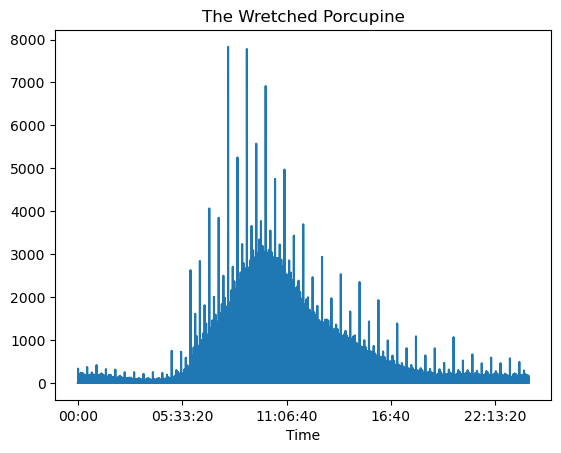

In [3]:
arrests_tod["Time"] = pd.to_datetime(arrests_tod["Apprehension Date Time"]).sort_index()
arrests_tod.Time.apply(lambda x : x.time()).value_counts().sort_index().plot.line(title="The Wretched Porcupine")

### This is a highly naiive implementation
<i> Unfortunately, as many officers enter rounded timestamps to the nearest hour, halfhour, or fifteen minutes (visible in the variously sized spikes in this chart), we don't really have a pretty organiation. This would easily demonstrates more active times, but instead of spending time beautifying this tiny thing, we'll group the data first for readibility. </i>

To do this, we'll round all timestamps to the nearest halfhour:

In [4]:
#some helper funcs

#round a datetime to nearest halfhour, preserving date info
def round_halfhour(t):
    delta = timedelta(minutes=30)
    return (t + delta // 2) - timedelta(minutes=t.minute % 30-15, seconds=t.second, microseconds=t.microsecond)

#WILDLY slow, like oh my god this is so slow, but this is what you get for doing rounding operations on multiple millions
#takes DF with col "Time" of datetimes
def get_clean_tod(tod):
    return tod.Time.map(round_halfhour).apply(lambda x : x.time()).value_counts().sort_index()

#plot heatmap bar graph. takes DF with col "Time" of datetimes & name of graph
def tod_heatmap(tod, name):
    tod = get_clean_tod(tod) #clean up inputs
    
    #map values to colours
    m = interp1d([tod.min(),tod.max()],[0,255])
    colours = cm.viridis(tod.map(m).astype(int))

    #the plot :3
    return tod.plot.bar(figsize=(10, 4), ylabel='Number of Arrests', rot = 45, color=colours, title=name).locator_params(axis='x', nbins=24)

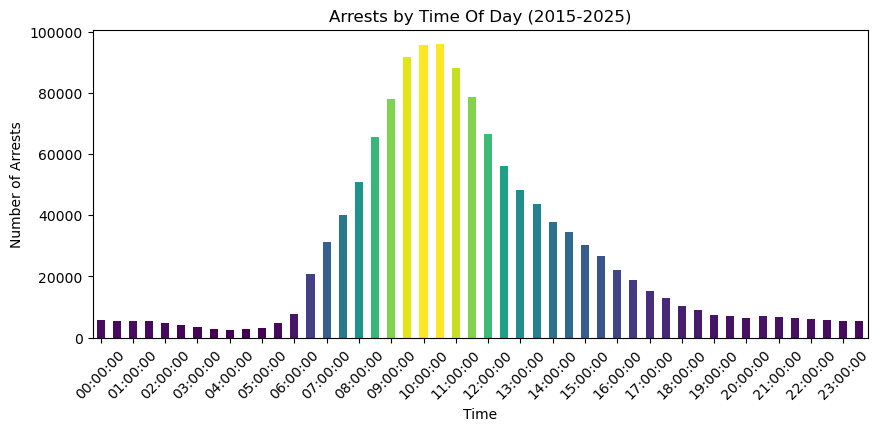

In [5]:
#2015 as no ToD vals exist before then
tod_heatmap(arrests_tod, "Arrests by Time Of Day (2015-2025)")

### Let's double-check that this still holds for recent ICE activity

In [ ]:
#all arrests with ToD post 2020
post_2020 = arrests_tod[datetime.datetime(2020, 1, 1) < arrests_tod.Time]
tod_heatmap(post_2020, "Arrests by Time Of Day (2020-2025)")

<i> So we can see clearly now that between 9am-11am is peak ICE activity, dropping off after noon slowly. Activity is consistently very low after 6pm, and picks up around 7am.</i>

<b> This would suggest that community-defense efforts (ICE watches, among other things) should focus their efforts during the late mornings moreso than any other time of day, though ICE activity remains high until mid-afternoon</b>